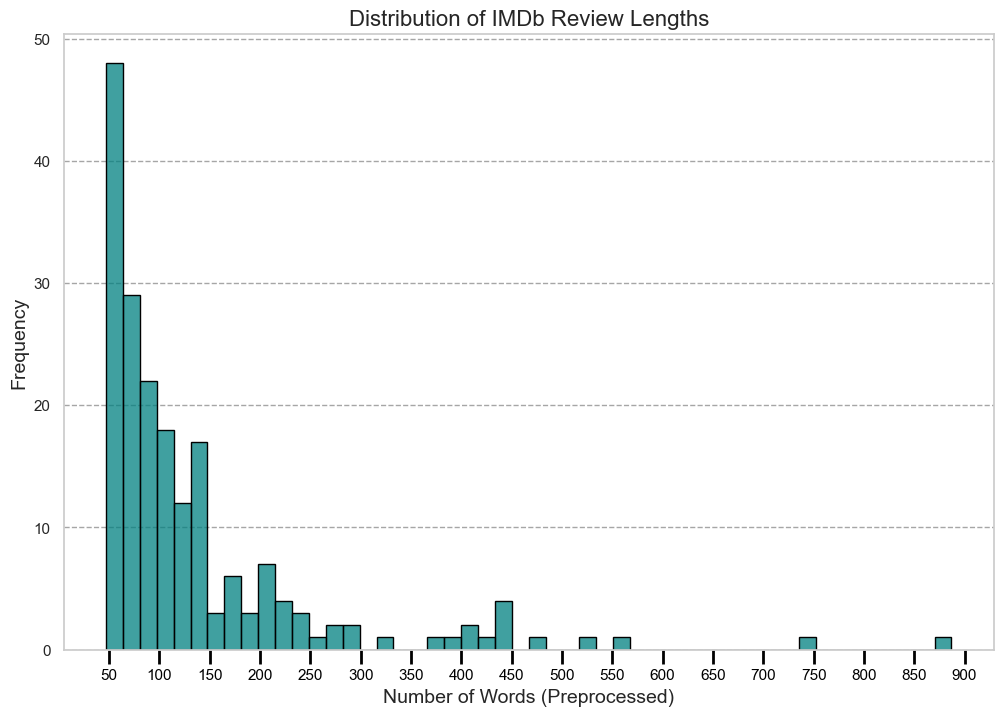

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Load the CSV file
df = pd.read_csv("data/IMDb_Cleaned_Reviews.csv")

# Compute review length as number of words in each review
df['Review Length'] = df['Review Content'].apply(lambda x: len(str(x).split()))

# Set Seaborn style
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
ax = sns.histplot(data=df, x='Review Length', bins=50, kde=False, color='teal', edgecolor='black')

# Increase tick distance on the x-axis to 50
ax.xaxis.set_major_locator(ticker.MultipleLocator(50))

# Remove vertical gridlines (keep horizontal gridlines)
ax.grid(axis='x', which='major', linestyle='', linewidth=0)
ax.grid(axis='y', which='major', linestyle='--', color='gray', alpha=0.7)

# Ensure ticks are visible on the bottom, with a protruding marker
ax.tick_params(axis='x', which='both', direction='out', length=10, width=2, colors='black', bottom=True)

# Add titles and labels
plt.title("Distribution of IMDb Review Lengths", fontsize=16)
plt.xlabel("Number of Words (Preprocessed)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.show()





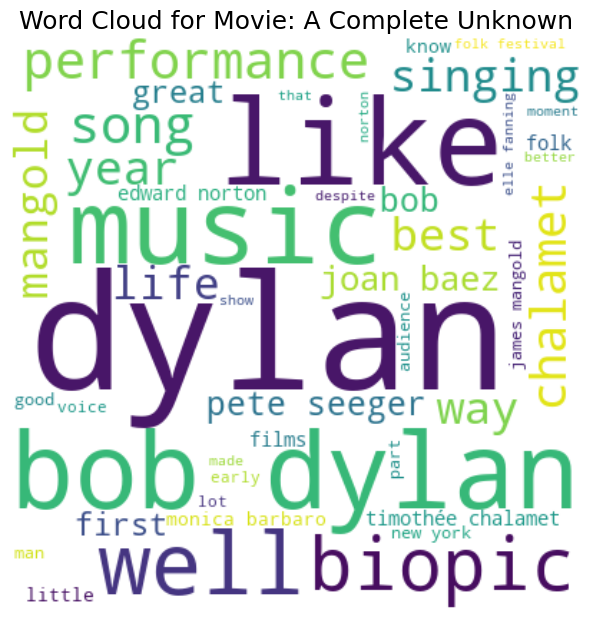

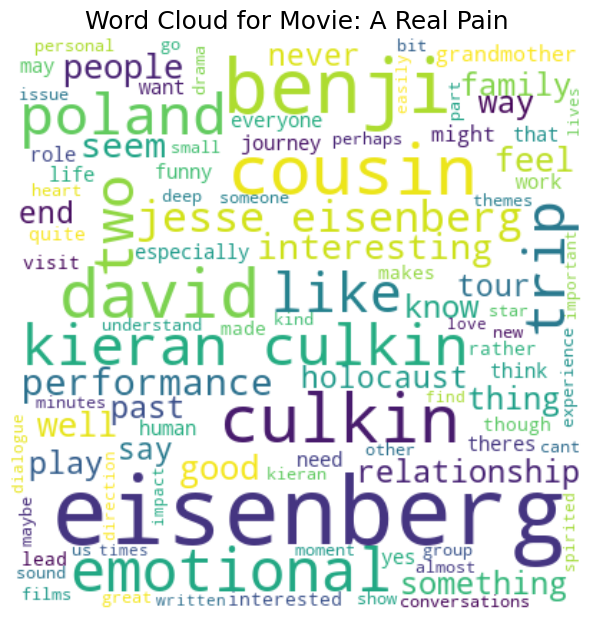

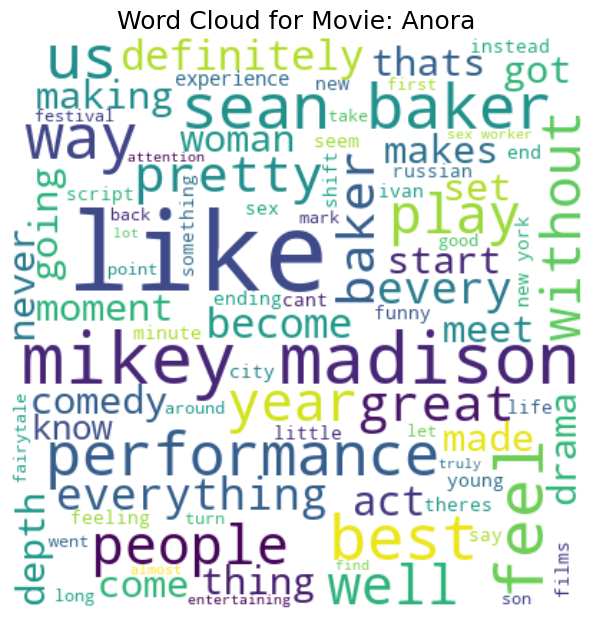

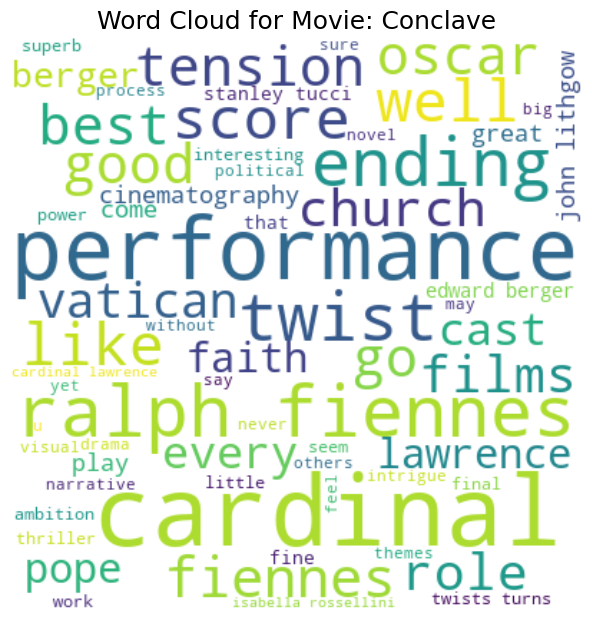

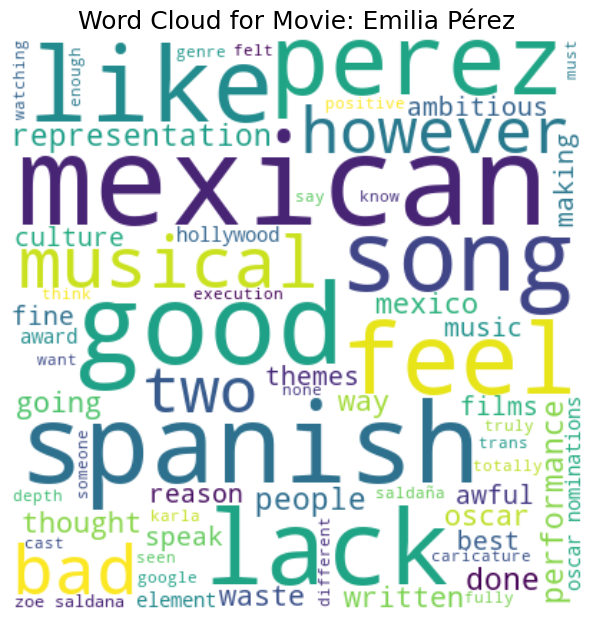

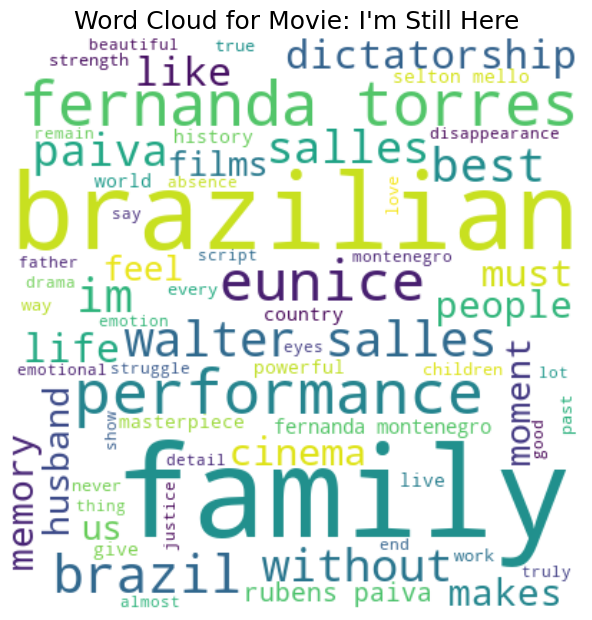

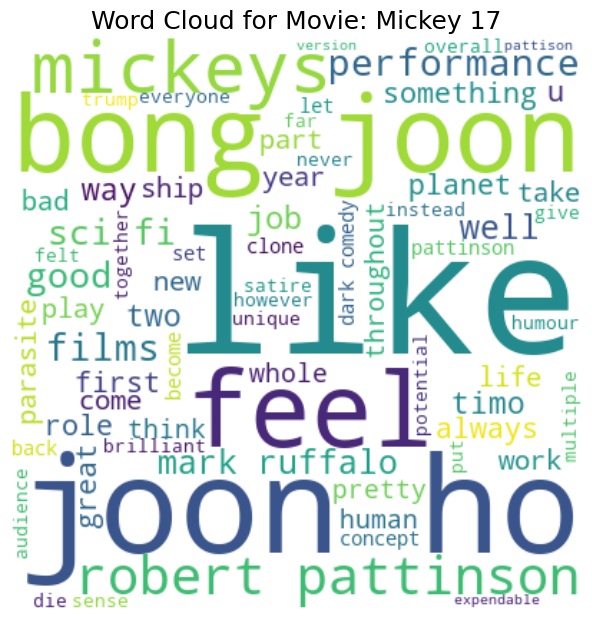

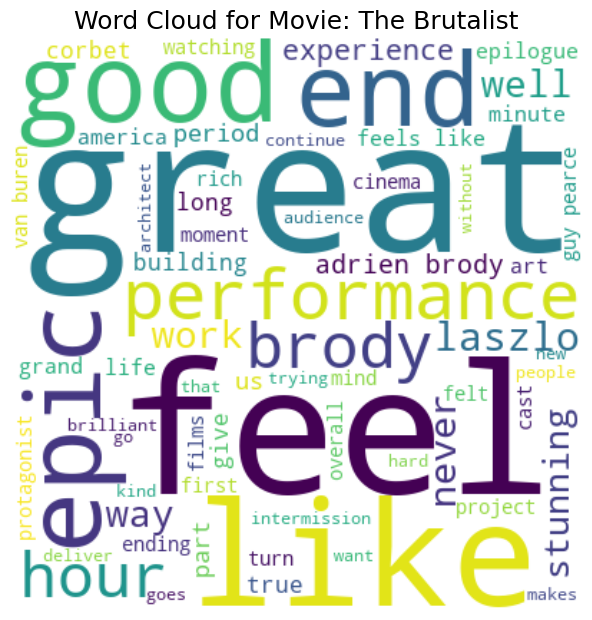

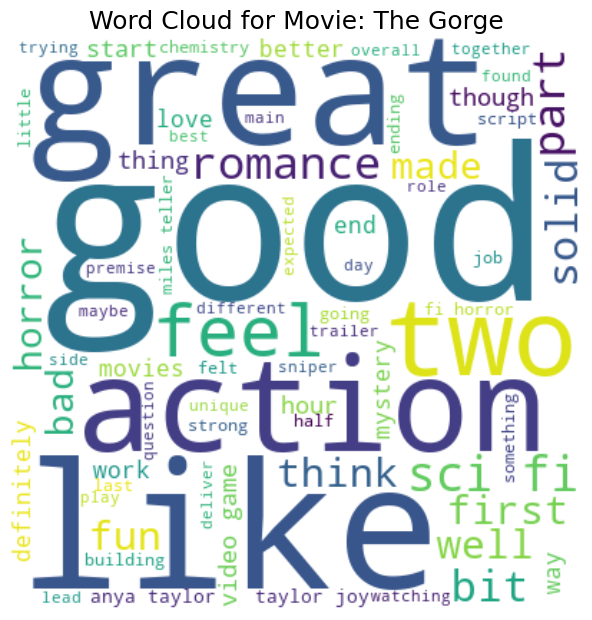

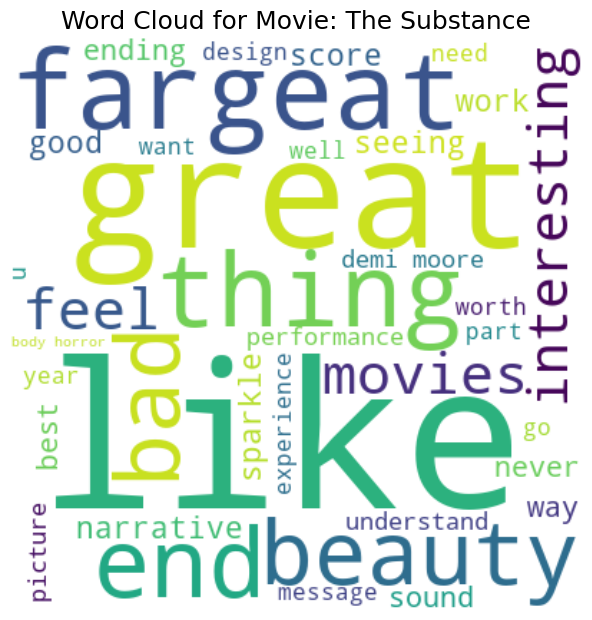

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import requests

df = pd.read_csv("data/IMDb_Cleaned_Reviews.csv")

# Remove high-frequency words that have no meaning
custom_stopwords = set([
    "movie", "film", "one", "really", "get", "even", "see", 
    "watch", "story", "character", "characters", "much", "many", "make",
    "time", "just", "also", "would", "could",
    "plot", "scene", "scenes", "actors", "acting", "director", "review"
])

# Remove high-frequency occurrence of movie names
for movie_name in df["Movie Name"].dropna():
    tokens = movie_name.split()  
    custom_stopwords.update(tokens) 

# Create word cloud for each movie
movies = df.groupby("Movie Name")

for movie_name, movie_reviews in movies:
    # Combine Review Title and Review Content
    text = " ".join(movie_reviews["Review Title"].astype(str) + " " + movie_reviews["Review Content"].astype(str))
    wordcloud = WordCloud(width=400, height=400, 
                          background_color='white', 
                          stopwords=custom_stopwords,
                          min_font_size=10).generate(text)
    
    plt.figure(figsize=(6, 6), facecolor='white', edgecolor='blue')
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for Movie: {movie_name}", fontsize=18)
    plt.tight_layout(pad=0)
    plt.show()


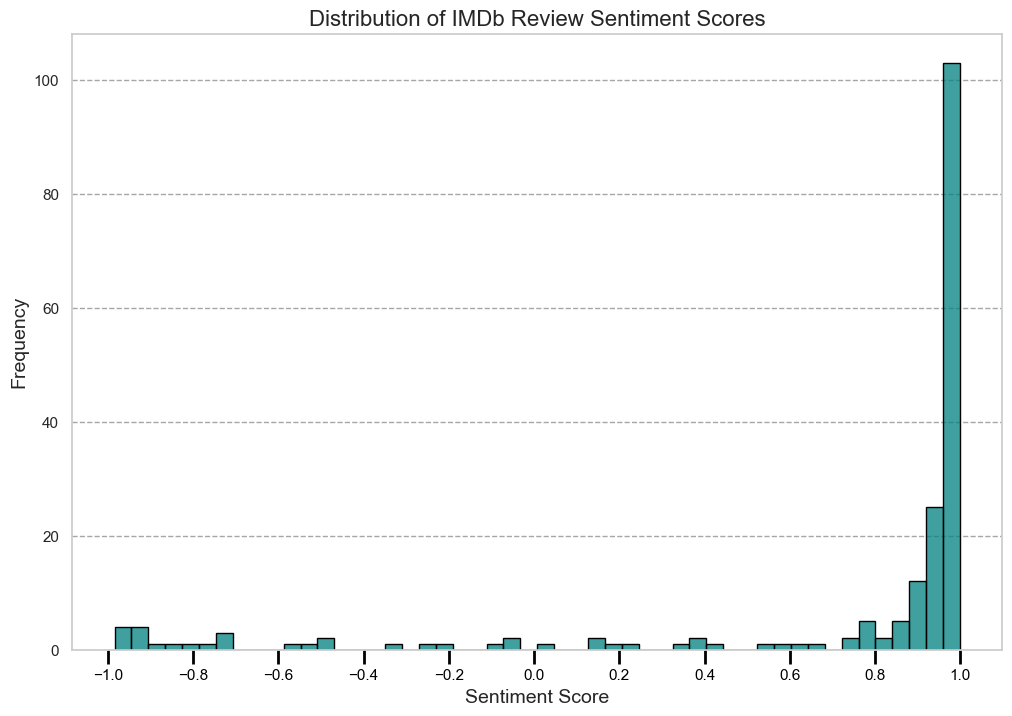

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Load the CSV file with sentiment scores
df = pd.read_csv("data/IMDb_Cleaned_Reviews_With_Sentiment.csv")

# Set the Seaborn style for a clean look
sns.set(style="whitegrid")

# Create a figure for the histogram
plt.figure(figsize=(12, 8))
ax = sns.histplot(data=df, x='Sentiment Score', bins=50, kde=False, color='teal', edgecolor='black')

# Configure x-axis tick spacing (Sentiment scores typically range from -1 to 1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.2))

# Customize tick parameters to make them visible and protruding
ax.tick_params(axis='x', which='both', direction='out', length=10, width=2, colors='black', bottom=True)

# Remove vertical gridlines while keeping horizontal gridlines for reference
ax.grid(axis='x', which='major', linestyle='', linewidth=0)
ax.grid(axis='y', which='major', linestyle='--', color='gray', alpha=0.7)

# Add titles and labels
plt.title("Distribution of IMDb Review Sentiment Scores", fontsize=16)
plt.xlabel("Sentiment Score", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Display the plot
plt.show()
